# HW6 Multiple Linear Regression

In [2]:
### import module 

import pandas as pd
import xarray as xr
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Open and Check Data

In [3]:
### plot the data
df = pd.read_csv('../data/MaunaLoaCO2.txt', header=None)
df

,0
0,-99.99
1,-99.99
2,315.71
3,317.45
4,317.51
...,...
787,419.56
788,418.07
789,-99.99
790,-99.99


### 1. Simple linear regression of $x_{1}$ = $t$

In [4]:
### change negative value into nan velues
df1 = df.mask(df < 0, np.nan)
df_ar = df1.to_numpy()
print(df_ar.shape)

(792, 1)


In [5]:
### create time value by having the number of CO2 data
time = np.arange(len(df_ar))
print(time.shape)

(792,)


(792,)
(792,)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.138e+04
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:53:35   Log-Likelihood:                -2340.8
No. Observations:                 782   AIC:                             4686.
Df Residuals:                     780   BIC:                             4695.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    304.7494      0.349    87

Text(0.5, 1.0, 'Single Predictor of Time')

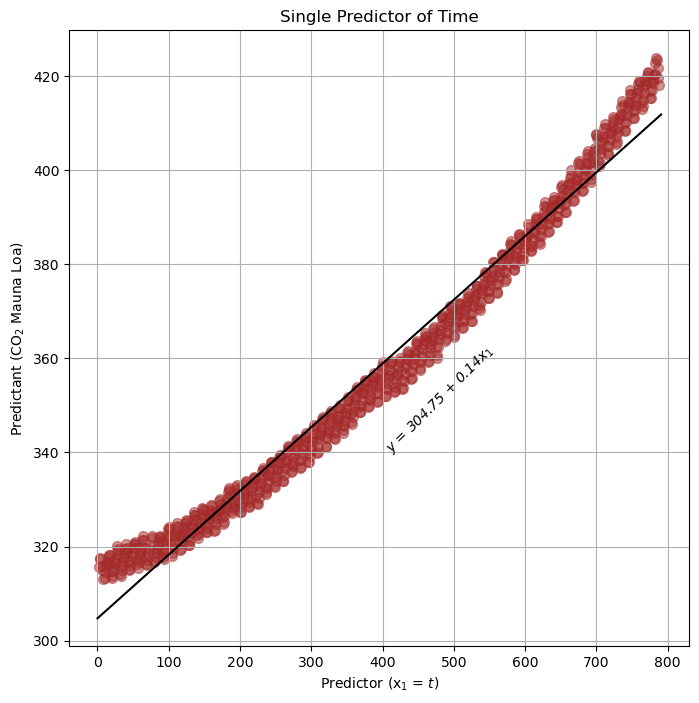

In [6]:
### perform stats model for single predictor
# import module
import statsmodels.api as sm
import statsmodels.formula.api as smf

# change variable to ease the calculation
X = time
print(X.shape)
Y = df_ar[:,0]
print(Y.shape)

# store the data into one dataframe
data = {'X': X,
        'Y': Y}
df = pd.DataFrame(data)

# perform stats model
model = smf.ols(formula='Y ~ X', data=df).fit()
print(model.summary())

anova_table = sm.stats.anova_lm(model,typ=2)
print("\nANOVA Table:\n", anova_table)

# plot the data
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(time, df['Y'], color='brown', marker='o', s=50, alpha=0.5, label='x$_{1}$')
ax.plot(time, model.params[0] + time*model.params[1], color='k')
ax.set_xlabel('Predictor (x$_{1}$ = $t$)')
ax.set_ylabel('Predictant (CO$_{2}$ Mauna Loa)')

# add the model equation to the plot
equation = f'y = {model.params["Intercept"]:.2f} + {model.params["X"]:.2f}x$_{1}$'
plt.text(400, 340, equation, fontsize=10, color='k', fontstyle='italic', rotation=45)
ax.grid()
#ax.legend()
ax.set_title('Single Predictor of Time')

In [7]:
### manually check the goodness of fit

n = len(df['X'])
print("n:", n)

# calculate SST
Y_ave = np.mean(df['Y'])
SST = np.sum((df['Y'] - Y_ave)**2)
print('Y-ave: %.2f' %Y_ave)
formatted_number = "{:.2e}".format(SST)
print('SST:', formatted_number)

# calculate Y estimation 
df['Ye'] = model.params[0] + df['X']*model.params[1]

# modified data to drop value having row contain nan
df['Ye'] = np.where(df['Y'].isna(), np.nan, df['Ye'])
#print(df)

# calculate error
df['e'] = df['Y'] - df['Ye']

# calculate SSR
SSR = np.sum((df['Ye'] - Y_ave)**2)
formatted_number = "{:.2e}".format(SSR)
print('SSR:', formatted_number)

# calculate SSE
SSE = np.sum((df['Y'] - df['Ye'])**2)
print('SSE:', formatted_number)

print("\n Goodness of Fit")

# calculate MSE
sesq = 1/(n-2) * (np.sum(df['e']**2))
print('se\u00b2/MSE - manual: %.2f'% sesq)
mse_resid = model.mse_resid
print('se\u00b2/MSE - canned: %.2f'% mse_resid)

# calculate R-squared
Rsq = SSR/SST
print('R\u00b2: %.3f' % Rsq)

# calculate F-Ratio
Frat = SSR/sesq
formatted_number = "{:.2e}".format(Frat)
print('F Ratio:', formatted_number)


n: 792
Y-ave: 358.53
SST: 7.51e+05
SSR: 7.33e+05
SSE: 7.33e+05

 Goodness of Fit
se²/MSE - manual: 23.07
se²/MSE - canned: 23.37
R²: 0.976
F Ratio: 3.18e+04


### 2. Add predictor of $x_{2}$ = $t^2$

(792,)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.510e+04
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:53:38   Log-Likelihood:                -1735.6
No. Observations:                 782   AIC:                             3477.
Df Residuals:                     779   BIC:                             3491.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    314.6487      0.245   1284.695  

Text(0.5, 1.0, 'Two Predictors of Linear Regression')

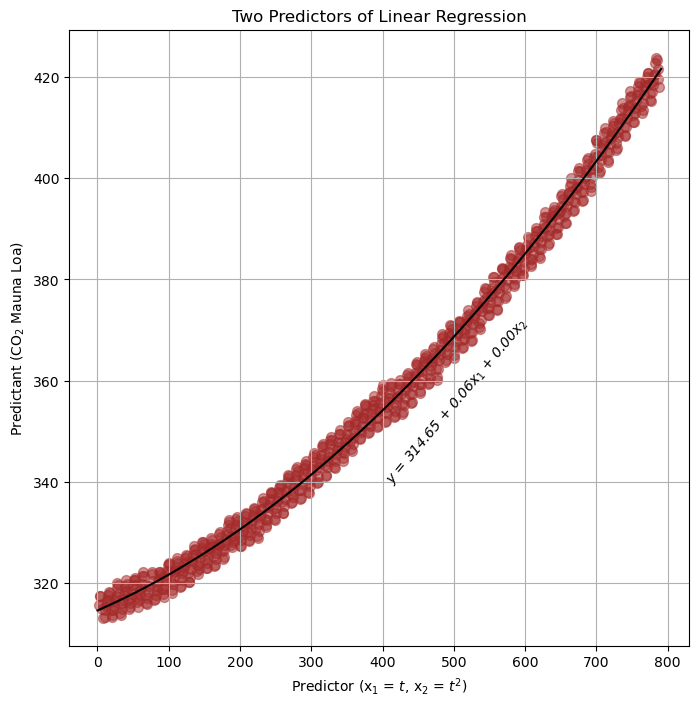

In [8]:
### add predictor
X2 = time**(2)

### create another dataframe with two predictors
data = {'X1': X,
        'X2': X2,
        'Y': Y}

df = pd.DataFrame(data)
print(df['Y'].shape)

model = smf.ols(formula='Y ~ X1 + X2', data=df).fit()
print(model.summary())

anova_table = sm.stats.anova_lm(model,typ=2)
print("\nANOVA Table:\n", anova_table)

# plot the data
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(time, df['Y'], color='brown', marker='o', s=50, alpha=0.5)
ax.plot(time, model.params[0] + time*model.params[1] + (time**2)*model.params[2], color='black')

ax.set_xlabel('Predictor (x$_{1}$ = $t$, x$_{2}$ = $t^{2}$)')
ax.set_ylabel('Predictant (CO$_{2}$ Mauna Loa)')

# add the model equation to the plot
equation = f'y = {model.params["Intercept"]:.2f} + {model.params["X1"]:.2f}x$_{1}$ + {model.params["X2"]:.2f}x$_{2}$'
plt.text(400, 340, equation, fontsize=10, color='k', fontstyle='italic', rotation=50)
ax.grid()
ax.set_title('Two Predictors of Linear Regression')


In [9]:
### manually check the goodness of fit

n = len(df['X1'])
print("n:", n)

# calculate SST
Y_ave = np.mean(df['Y'])
SST = np.sum((df['Y'] - Y_ave)**2)
print('Y-ave: %.2f' %Y_ave)
formatted_number = "{:.2e}".format(SST)
print('SST:', formatted_number)

# calculate Y estimation 
df['Ye'] = model.params[0] + df['X1']*model.params[1] + (df['X1']**2)*model.params[2]

# modified data to drop value having row contain nan
df['Ye'] = np.where(df['Y'].isna(), np.nan, df['Ye'])
#print(df)

# calculate error
df['e'] = df['Y'] - df['Ye']

# calculate SSR
SSR = np.sum((df['Ye'] - Y_ave)**2)
formatted_number = "{:.2e}".format(SSR)
print('SSR:', formatted_number)

# calculate SSE
SSE = np.sum((df['Y'] - df['Ye'])**2)
print('SSE:', formatted_number)

print("\n Goodness of Fit")

# calculate MSE
sesq = 1/(n-2) * (np.sum(df['e']**2))
print('se\u00b2/MSE - manual: %.2f'% sesq)
mse_resid = model.mse_resid
print('se\u00b2/MSE - canned: %.2f'% mse_resid)

# calculate R-squared
Rsq = SSR/SST
print('R\u00b2: %.3f' % Rsq)

# calculate F-Ratio
Frat = SSR/sesq
formatted_number = "{:.2e}".format(Frat)
print('F Ratio:', formatted_number)

n: 792
Y-ave: 358.53
SST: 7.51e+05
SSR: 7.48e+05
SSE: 7.48e+05

 Goodness of Fit
se²/MSE - manual: 4.91
se²/MSE - canned: 4.98
R²: 0.995
F Ratio: 1.52e+05


### 3. Add two other predictors of $x_{3}$ = $cos(\frac{2 \pi t}{12})$ and $x_{4}$ = $sin(\frac{2 \pi t}{12})$

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.115e+05
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:53:42   Log-Likelihood:                -1060.4
No. Observations:                 782   AIC:                             2131.
Df Residuals:                     777   BIC:                             2154.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    314.6258      0.103   3042.278      0.0

Text(0.5, 1.0, 'Four Predictors of Linear Regression')

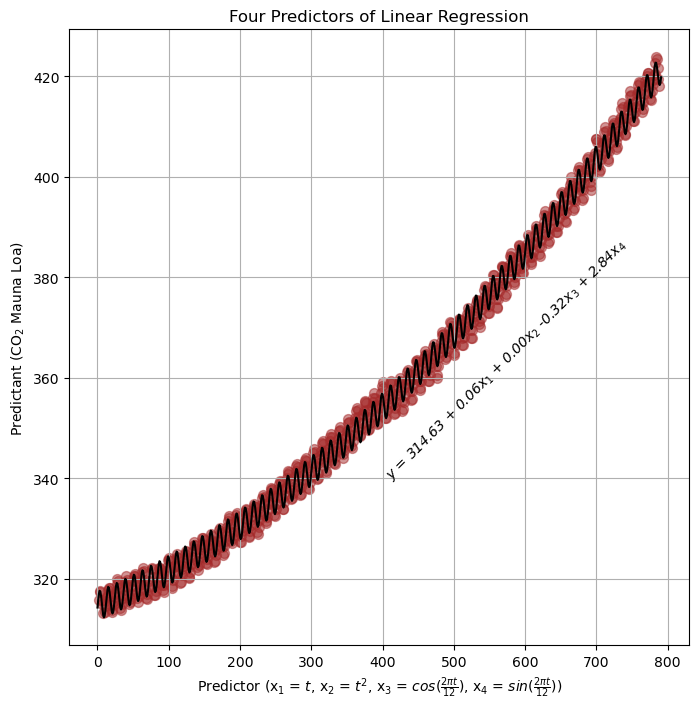

In [10]:
### add predictor
X2 = time**(2)
X3 = np.cos(2 * np.pi * time/12)
X4 = np.sin(2 * np.pi * time/12)

### create another dataframe with two predictors
data = {'X1': X,
        'X2': X2,
        'X3': X3,
        'X4': X4,
        'Y': Y}

df = pd.DataFrame(data)

model = smf.ols(formula='Y ~ X1 + X2 + X3 + X4', data=df).fit()
print(model.summary())

anova_table = sm.stats.anova_lm(model,typ=2)
print("\nANOVA Table:\n", anova_table)

# plot the data
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(time, df['Y'], color='brown', marker='o', s=50, alpha=0.5)
ax.plot(time, model.params[0] + time*model.params[1] + (time**2)*model.params[2]\
        + (np.cos(2 * np.pi * time/12))*model.params[3]\
        + (np.sin(2 * np.pi * time/12))*model.params[4], color='black')

ax.set_xlabel(r'Predictor (x$_{1}$ = $t$, x$_{2}$ = $t^{2}$, x$_{3}$ = $cos (\frac{2\pi t}{12})$, x$_{4}$ = $sin (\frac{2\pi t}{12})$)')
ax.set_ylabel('Predictant (CO$_{2}$ Mauna Loa)')

# add the model equation to the plot
equation = f'y = {model.params["Intercept"]:.2f} + {model.params["X1"]:.2f}x$_{1}$ + {model.params["X2"]:.2f}x$_{2}$ {model.params["X3"]:.2f}x$_{3}$ + {model.params["X4"]:.2f}x$_{4}$'
plt.text(400, 340, equation, fontsize=10, color='k', fontstyle='italic', rotation=45)
ax.grid()
ax.set_title('Four Predictors of Linear Regression')


In [11]:
### manually check the goodness of fit

n = len(df['X1'])
print("n:", n)

# calculate SST
Y_ave = np.mean(df['Y'])
SST = np.sum((df['Y'] - Y_ave)**2)
print('Y-ave: %.2f' %Y_ave)
formatted_number = "{:.2e}".format(SST)
print('SST:', formatted_number)

# calculate Y estimation 
df['Ye'] =  model.params[0] + df['X1']*model.params[1] + (df['X1']**2)*model.params[2]\
        + (np.cos(2 * np.pi * df['X1']/12))*model.params[3]\
        + (np.sin(2 * np.pi * df['X1']/12))*model.params[4]

# modified data to drop value having row contain nan
df['Ye'] = np.where(df['Y'].isna(), np.nan, df['Ye'])
#print(df)

# calculate error
df['e'] = df['Y'] - df['Ye']

# calculate SSR
SSR = np.sum((df['Ye'] - Y_ave)**2)
formatted_number = "{:.2e}".format(SSR)
print('SSR:', formatted_number)

# calculate SSE
SSE = np.sum((df['Y'] - df['Ye'])**2)
print('SSE:', formatted_number)

print("\n Goodness of Fit")

# calculate MSE
sesq = 1/(n-2) * (np.sum(df['e']**2))
print('se\u00b2/MSE - manual: %.2f'% sesq)
mse_resid = model.mse_resid
print('se\u00b2/MSE - canned: %.2f'% mse_resid)

# calculate R-squared
Rsq = SSR/SST
print('R\u00b2: %.3f' % Rsq)

# calculate F-Ratio
Frat = SSR/sesq
formatted_number = "{:.2e}".format(Frat)
print('F Ratio:', formatted_number)

n: 792
Y-ave: 358.53
SST: 7.51e+05
SSR: 7.51e+05
SSE: 7.51e+05

 Goodness of Fit
se²/MSE - manual: 0.87
se²/MSE - canned: 0.89
R²: 0.999
F Ratio: 8.60e+05
